# Setup of $\pi$BO

## Imports

In [21]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constants

In [22]:
T=3 # time-steps on which I work
std = 0.1 # standard deviation for pi-prior
beta = 1 # beta=N/10
N = 10 # number of iterations for each time-step

## Optima Location

In [23]:
t_axis = np.linspace(1,T,T, dtype=int)
a_param = -2.15
b_param = 1
y = a_param*t_axis+b_param # the line on which I assume the best values to be

# y_noisy = np.random.normal(y,std) # with added noise

## Utility Functions

In [24]:
def power(my_list, exp):
    '''Raises each item of a list to the desired exponent'''
    my_power_list = []
    for item in my_list:
        if item>=0:
            ritem = item**exp
        else:
            ritem = -(abs(item)**exp)
        my_power_list.append(ritem)
    return my_power_list

In [25]:
def compute_stats(y_function, standard_dev):
    '''Computes all the necessary lists associated to he Gaussian distribution'''
    fun_variates = []
    fun_amps = []
    fun_pdfs = []
    
    for mean in y_function:
        fun_variates.append(stats.norm.rvs(mean,standard_dev,10))
        amp = np.linspace(mean-5*standard_dev,mean+5*standard_dev,10)
        fun_amps.append(amp)
        # fun_pdfs.append(stats.norm.pdf(amp, loc=mean, scale=standard_dev))
        fun_pdfs.append(stats.norm.pdf(amp, mean, standard_dev))

    return fun_variates, fun_amps, fun_pdfs

In [26]:
def normalize_pdfs(my_pdf_list):
    '''Normalizes the PDFs between 0 and 1'''
    fun_normalized_pdfs_list = []
    
    for fun_pdf_list in my_pdf_list:
        temp_list = []
        pdf_min = min(fun_pdf_list)
        pdf_max = max(fun_pdf_list)
        for fun_pdf_value in fun_pdf_list:
            temp_list.append(round((fun_pdf_value-pdf_min)/(pdf_max-pdf_min),2))
        fun_normalized_pdfs_list.append(temp_list)
        
    return fun_normalized_pdfs_list

In [27]:
def predict(time, variates, norm_pdfs):
    prediction = []
    for time_step in time:
        if (min(variates[time_step-1])+max(variates[time_step-1]))<0:
            optimum = min(variates[time_step-1]*norm_pdfs[time_step-1])
        else:
            optimum = max(variates[time_step-1]*norm_pdfs[time_step-1])
        prediction.append(optimum)
    
    return prediction

In [28]:
def raised_priors(my_list):
    '''Computes the priors with different exponents'''
    raised_list = []
    
    for i in range (1,N+1):
        temp = []
        gamma = beta/i
        for n_l in my_list:
            temp.append(power(n_l,beta/i))
        raised_list.append(temp)
    return raised_list

In [29]:
def predict_raised(iter_range, time_range, raised_variates, norm_pdfs):
    predictions = []
    for n_count in range(iter_range):
        temp = []
        for t_count in range(time_range):
            if (min(raised_variates[n_count][t_count])+max(raised_variates[n_count][t_count]))<0:
                optimum = min(np.multiply(raised_variates[n_count][t_count],norm_pdfs[t_count]))
            else:
                optimum = max(np.multiply(raised_variates[n_count][t_count],norm_pdfs[t_count]))
            temp.append(optimum)
        predictions.append(temp)
    return predictions

## Setup

In [31]:
all_variates, all_amps, all_pdfs = compute_stats(y, std)

In [32]:
all_variates_raised = raised_priors(all_variates)

In [41]:
all_pdfs_normalized = normalize_pdfs(all_pdfs)

np.shape(all_pdfs_normalized)

(3, 10)

In [34]:
predicted_optima = predict(t_axis, all_variates, all_pdfs_normalized)

In [35]:
predicted_optima_raised = predict_raised(N,T,all_variates_raised,all_pdfs_normalized)

From the document: $\pi_s(\bar{x})\sim\mathcal{N}(\bar{x}^*+\bar{\epsilon},\sigma_s)$, con $\epsilon_i=\mathcal{N}(0,\sigma_s)$.

It is right to add noise when I start from the exact known optima. Given that the line I choose is an approximation of the true one, there is no benefit in adding extra noise (since it is there already).

In [36]:
# all_variates_noisy, all_amps_noisy, all_pdfs_noisy = compute_stats(y_noisy, std)
# all_variates_noisy_raised =raised_priors(all_variates_noisy)
# all_pdfs_noisy_normalized = normalize_pdfs(all_pdfs_noisy)
# predicted_optima_noisy = predict(t_axis, all_variates_noisy, all_pdfs_noisy_normalized)

## Plots

Let's plot the supposed optima and the line on which they reside

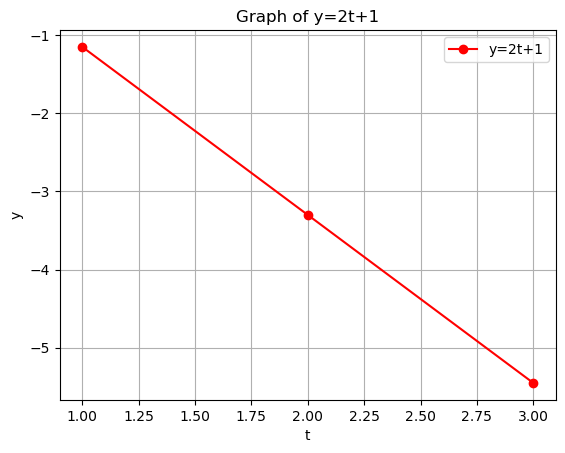

In [37]:
if T>5:
    plt.figure(figsize=(15,6))

plt.plot(t_axis, y, '-ro', label='y=2t+1')
plt.title('Graph of y=2t+1')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Plots the computed PDFs

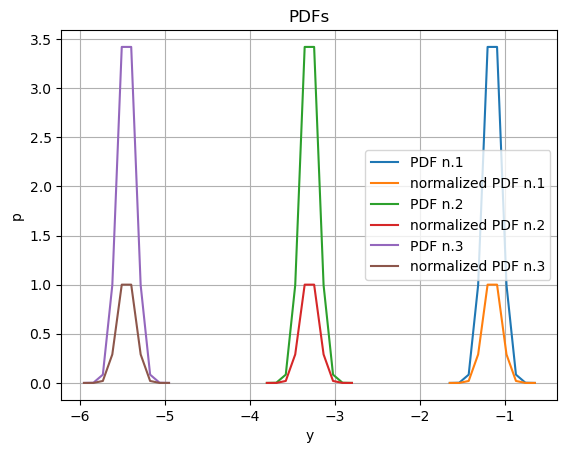

In [38]:
if T>5:
    plt.figure(figsize=(15,6))

for i in t_axis:
    plt.plot(all_amps[int(i)-1], all_pdfs[int(i)-1], label='PDF n.%d' % i)
    plt.plot(all_amps[int(i)-1], all_pdfs_normalized[int(i)-1], label='normalized PDF n.%d' % i)

plt.grid()
plt.title('PDFs')
plt.xlabel('y')
plt.ylabel('p')
plt.legend()
plt.show()

Plots the maxima and minima of the distributions for each supposed optimum, along the predicted optima

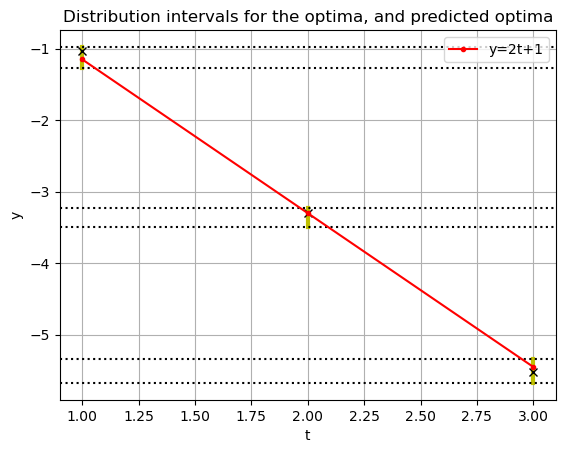

In [39]:
if T>5:
    plt.figure(figsize=(15,6))

for counter,element in enumerate(all_variates, start=1):
    
    min_var = min(element)
    max_var = max(element)
    
    plt.plot([counter,counter],[min_var,max_var], color = 'y', linewidth = 3)
    
    plt.axhline(y = min_var, color = 'k', linestyle = ':')
    plt.axhline(y = max_var, color = 'k', linestyle = ':')
    
    plt.plot(counter, predicted_optima[counter-1], 'kx')
    

plt.plot(t_axis, y, '-r.', label='y=2t+1')
plt.title('Distribution intervals for the optima, and predicted optima')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Plots the distributions of the optima raised to $\gamma = \frac{\beta}{i}$

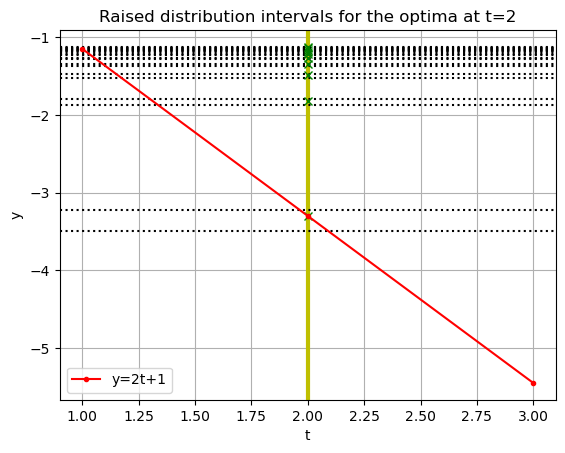

In [40]:
if T>5:
    plt.figure(figsize=(15,6))

plt.axvline(x = 2, color = 'y', linewidth = 3)

for i in range(N):
    plt.axhline(y = min(all_variates_raised[i][1]), color = 'k', linestyle = ':')
    plt.axhline(y = max(all_variates_raised[i][1]), color = 'k', linestyle = ':')
    plt.plot(2, predicted_optima_raised[i][1], 'gx')
    
plt.plot(t_axis, y, '-r.', label='y=2t+1')
plt.title('Raised distribution intervals for the optima at t=2')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()